In [25]:
!pip install opencv-python

In [26]:
import cv2
cv2.__version__

'4.6.0'

In [27]:
import numpy as np
import matplotlib.pyplot as plt

*Cambien el tipo de color a RGB*

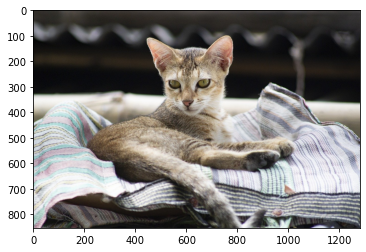

In [28]:
#leyendo las imágenes
img1 = cv2.imread('cat-1.jpg')
img2 = cv2.imread('cat-2.jpg')
img3 = cv2.imread('dog.jpg')
img4 = cv2.imread('dog-2.jpg')
img5 = cv2.imread('female.jpg')
img6 = cv2.imread('boys.jpg')

#cambiando de color a RGB
cat1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
cat2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
dog1 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
dog2 = cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
female1 = cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
boy1 = cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)

plt.imshow(cat1)


*Hagan girar una imagen*

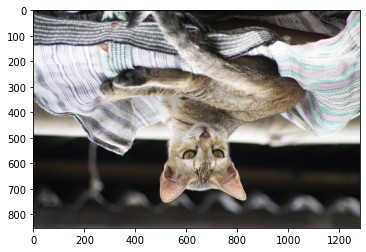

In [29]:
cat1Rotated = cv2.rotate(cat1, cv2.ROTATE_180)

plt.imshow(cat1Rotated)

*Dibujen un círculo sobre las caras de dicha figura y agreguen un texto que describa que es (persona, perro, gato).*

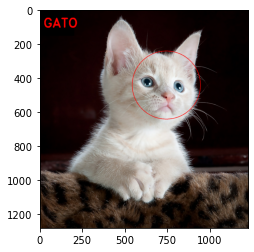

In [30]:
cat2copy = cat2.copy()

x,y,w,h = 0,0,200,150

#background rectangule
cv2.rectangle(cat2copy, (x,x), (x + w, y + h), (0,0,0), -1)

cv2.putText(img=cat2copy, text="GATO",org=(x + int(w/10),y + int(h/1.5)), 
            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.5, color=(255,0,0), thickness=5)

cat2Circle = cv2.circle(cat2copy,(740,440),200,(255, 0, 0),2)

plt.imshow(cat2Circle)


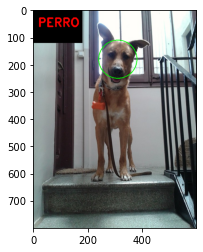

In [31]:
dog1copy = dog1.copy()

x,y,w,h = 0,0,180,120

#background rectangule
cv2.rectangle(dog1copy, (x,x), (x + w, y + h), (0,0,0), -1)

cv2.putText(img=dog1copy, text="PERRO",org=(x + int(w/10),y + int(h/2)), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=1.5, color=(255,0,0), thickness=4)

dog1Circle = cv2.circle(dog1copy,(310,180),70,(0, 250, 0),2)

plt.imshow(dog1Circle)

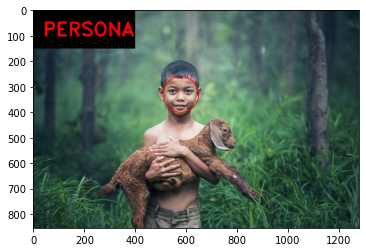

In [32]:
boy1copy = boy1.copy()

x,y,w,h = 0,0,400,150

#background rectangule
cv2.rectangle(boy1copy, (x,x), (x + w, y + h), (0,0,0), -1)

cv2.putText(img=boy1copy, text="PERSONA",org=(x + int(w/10),y + int(h/1.5)), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.5, color=(255,0,0), thickness=5)

boy1Circle = cv2.circle(boy1copy,(580,330),70,(255, 0, 0),2)

plt.imshow(boy1Circle)

*Guarden la figura con los círculos dibujados y el texto generado*

In [33]:
# plt.imshow(boy1Circle)

cv2.imwrite('cat2modifed.jpg',cv2.cvtColor(cat2Circle, cv2.COLOR_RGB2BGR))
cv2.imwrite('dog1modifed.jpg',cv2.cvtColor(dog1Circle, cv2.COLOR_RGB2BGR))
cv2.imwrite('boy1modifed.jpg',cv2.cvtColor(boy1Circle, cv2.COLOR_RGB2BGR))

True

*En una imagen distinta al anterior creen una pentágono sobre las caras de las figuras y agreguen un texto que
describa que es (persona, perro, gato).*

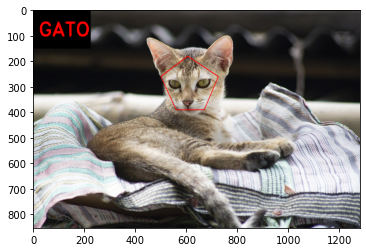

In [34]:
cat1copy = cat1.copy()

coordinates = np.array([[605,180],
                        [500, 260], [560, 390],
                        [670, 390], [725, 260]],
                       np.int32)

coordinates = coordinates.reshape((-1, 1, 2))

x,y,w,h = 0,0,225,150

cv2.rectangle(cat1copy, (x,x), (x + w, y + h), (0,0,0), -1)

cv2.putText(img=cat1copy, text="GATO",org=(x + int(w/10),y + int(h/1.5)), 
            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.5, color=(255,0,0), thickness=5)

cat1Poly = cv2.polylines(cat1copy, [coordinates], True, (255, 0, 0), 2)


plt.imshow(cat1Poly)

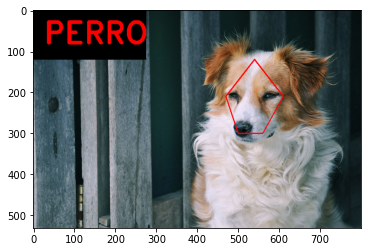

In [35]:
dog2copy = dog2.copy()

coordinates = np.array([[540,120],
                        [470, 210], [500, 300],
                        [560, 300], [610, 210]],
                       np.int32)

coordinates = coordinates.reshape((-1, 1, 2))

x,y,w,h = 0,0,275,120

cv2.rectangle(dog2copy, (x,x), (x + w, y + h), (0,0,0), -1)

cv2.putText(img=dog2copy, text="PERRO",org=(x + int(w/10),y + int(h/1.5)), 
            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.5, color=(255,0,0), thickness=5)

dog2Poly = cv2.polylines(dog2copy, [coordinates], True, (255, 0, 0), 2)


plt.imshow(dog2Poly)

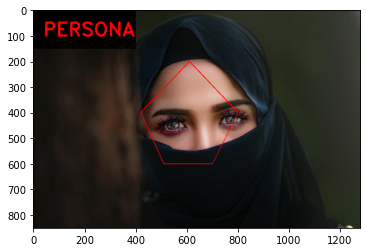

In [36]:
female1copy = female1.copy()

coordinates = np.array([[610,200],
                        [420, 400], [510, 600],
                        [700, 600], [800, 400]],
                       np.int32)

coordinates = coordinates.reshape((-1, 1, 2))

x,y,w,h = 0,0,400,150

cv2.rectangle(female1copy, (x,x), (x + w, y + h), (0,0,0), -1)

cv2.putText(img=female1copy, text="PERSONA",org=(x + int(w/10),y + int(h/1.5)), 
            fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.5, color=(255,0,0), thickness=5)

dog2Poly = cv2.polylines(female1copy, [coordinates], True, (255, 0, 0), 2)


plt.imshow(dog2Poly)

*Creen un programa que permita dibujar diferentes tipos de figuras geométricas con el uso de eventos de mouse
para poder hacer dibujos y luego guarden la imagen.*

In [37]:
img = np.zeros((512,512,3), np.uint8)
drawing = False
pt1_x , pt1_y = None , None

def draw(event,x,y,flags,param):
    global pt1_x,pt1_y,drawing

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        pt1_x,pt1_y=x,y

    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.line(img,(pt1_x,pt1_y),(x,y),color=(255,255,255),thickness=3)
            pt1_x,pt1_y=x,y
            
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False
        cv2.line(img,(pt1_x,pt1_y),(x,y),color=(255,255,255),thickness=3)        



cv2.namedWindow('test draw')
cv2.setMouseCallback('test draw',draw)

while(1):
    cv2.imshow('test draw',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()

*Modifiquen el programa para agregar funciones adicionales.*

In [38]:
drawing = False
img = np.zeros((512,512,3), np.uint8)


def draw(event,x,y,flags,param):
    global drawing

    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        cv2.circle(img, (x,y), 5 , (0,255,0), 2)
        
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False

    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(img, (x,y), 5 , (0,0,255), 2)
            
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.rectangle(img, (x,y), (x+30, y+30), (255,0,0), 3)  
        

cv2.namedWindow('window')
cv2.setMouseCallback('window',draw)
        
        
while(1):
    cv2.imshow('window',img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
cv2.destroyAllWindows()